In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
sales = pd.read_csv("sample-salesv2.csv",parse_dates=['date'])
sales.tail()

,account number,name,sku,category,quantity,unit price,ext price,date
995,758133,"Kihn, McClure and Denesik",WJ-02096,Belt,11,60.50,665.50,2014-08-03 10:39:00
996,850140,Kunze Inc,GS-86623,Shoes,16,19.66,314.56,2014-05-03 21:18:00
997,93356,Waters-Walker,GS-86623,Shoes,13,90.95,1182.35,2014-06-14 12:43:00
998,304860,Huel-Haag,LL-46261,Shoes,9,98.22,883.98,2014-07-26 01:10:00
999,98022,Heidenreich-Bosco,LW-86841,Shoes,14,74.83,1047.62,2014-06-27 05:58:00


In [3]:
sales.dtypes

account number             int64
name                      object
sku                       object
category                  object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
dtype: object

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   account number  1000 non-null   int64         
 1   name            1000 non-null   object        
 2   sku             1000 non-null   object        
 3   category        1000 non-null   object        
 4   quantity        1000 non-null   int64         
 5   unit price      1000 non-null   float64       
 6   ext price       1000 non-null   float64       
 7   date            1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 62.6+ KB


In [5]:
sales.describe()

,account number,quantity,unit price,ext price
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,535208.897000,10.328000,56.179630,579.84390
std,277589.746014,5.687597,25.331939,435.30381
min,93356.000000,1.000000,10.060000,10.38000
25%,299771.000000,5.750000,35.995000,232.60500
50%,563905.000000,10.000000,56.765000,471.72000
75%,750461.000000,15.000000,76.802500,878.13750
max,995267.000000,20.000000,99.970000,1994.80000


In [6]:
sales.describe(include='all')

<ipython-input-6-182947bdb2f6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  sales.describe(include='all')


,account number,name,sku,category,quantity,unit price,ext price,date
count,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000.00000,1000
unique,NaN,20,10,3,NaN,NaN,NaN,998
top,NaN,"Senger, Upton and Breitenberg",QN-82852,Shirt,NaN,NaN,NaN,2014-02-15 06:51:00
freq,NaN,59,109,404,NaN,NaN,NaN,2
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-10-22 13:54:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-22 11:43:00
mean,535208.897000,NaN,NaN,NaN,10.328000,56.179630,579.84390,NaN
std,277589.746014,NaN,NaN,NaN,5.687597,25.331939,435.30381,NaN
min,93356.000000,NaN,NaN,NaN,1.000000,10.060000,10.38000,NaN
25%,299771.000000,NaN,NaN,NaN,5.750000,35.995000,232.60500,NaN


In [7]:
prices = list(sales['unit price'])
prices

[44.48,
 53.62,
 24.16,
 82.68,
 99.64,
 52.82,
 15.28,
 78.78,
 38.19,
 26.98,
 60.22,
 13.12,
 59.69,
 97.25,
 81.44,
 53.33,
 35.62,
 98.23,
 69.52,
 80.12,
 81.19,
 48.15,
 54.94,
 57.75,
 47.68,
 41.4,
 58.52,
 96.62,
 93.67,
 72.63,
 90.8,
 42.96,
 71.5,
 74.43,
 35.38,
 24.87,
 15.33,
 94.34,
 12.78,
 28.71,
 11.21,
 29.79,
 35.82,
 55.43,
 95.75,
 12.63,
 26.21,
 92.1,
 98.27,
 65.4,
 23.79,
 52.01,
 13.06,
 92.43,
 57.69,
 83.05,
 26.49,
 88.24,
 75.38,
 66.61,
 99.88,
 41.75,
 22.23,
 71.38,
 89.82,
 85.12,
 75.04,
 45.05,
 76.77,
 99.09,
 71.25,
 40.3,
 10.38,
 69.32,
 82.74,
 81.64,
 50.63,
 81.41,
 18.45,
 17.36,
 55.09,
 17.54,
 82.51,
 14.9,
 89.05,
 57.99,
 35.82,
 56.0,
 77.52,
 47.07,
 70.12,
 28.61,
 73.92,
 38.82,
 69.26,
 28.54,
 79.15,
 36.19,
 93.21,
 23.76,
 44.1,
 41.05,
 47.78,
 95.92,
 50.1,
 75.51,
 64.38,
 17.42,
 81.67,
 74.08,
 25.91,
 57.32,
 78.61,
 50.85,
 72.12,
 24.91,
 43.25,
 66.32,
 24.3,
 53.7,
 80.82,
 91.71,
 16.05,
 86.18,
 87.56,
 27.49,
 73.

In [8]:
prices = tuple(sales['ext price'])
prices

(578.24,
 1018.78,
 289.92,
 413.4,
 1793.52,
 897.94,
 275.04,
 551.46,
 649.23,
 323.76,
 1144.18,
 78.72,
 238.76,
 1167.0,
 732.96,
 959.94,
 142.48,
 1669.91,
 1042.8,
 961.44,
 1055.47,
 96.3,
 54.94,
 231.0,
 667.52,
 82.8,
 351.12,
 1159.44,
 1124.04,
 871.56,
 181.6,
 257.76,
 71.5,
 74.43,
 283.04,
 397.92,
 214.62,
 1132.08,
 230.04,
 86.13,
 123.31,
 119.16,
 394.02,
 332.58,
 383.0,
 126.3,
 262.1,
 1013.1,
 982.7,
 392.4,
 237.9,
 364.07,
 143.66,
 1294.02,
 807.66,
 830.5,
 264.9,
 1323.6,
 979.94,
 1065.76,
 299.64,
 292.25,
 288.99,
 1284.84,
 808.38,
 851.2,
 1275.68,
 135.15,
 1228.32,
 1089.99,
 213.75,
 564.2,
 10.38,
 554.56,
 992.88,
 1387.88,
 253.15,
 488.46,
 239.85,
 295.12,
 495.81,
 52.62,
 577.57,
 44.7,
 534.3,
 1043.82,
 35.82,
 280.0,
 542.64,
 564.84,
 1262.16,
 572.2,
 887.04,
 77.64,
 969.64,
 542.26,
 554.05,
 723.8,
 1770.99,
 118.8,
 88.2,
 821.0,
 907.82,
 863.28,
 200.4,
 755.1,
 1223.22,
 209.04,
 898.37,
 444.48,
 466.38,
 343.92,
 471.66,
 25

In [9]:
price = list(sales['name'])
price

['Carroll PLC',
 'Heidenreich-Bosco',
 'Kerluke, Reilly and Bechtelar',
 'Waters-Walker',
 'Waelchi-Fahey',
 'Kerluke, Reilly and Bechtelar',
 'Cole-Eichmann',
 'Hegmann and Sons',
 'Senger, Upton and Breitenberg',
 'Kerluke, Reilly and Bechtelar',
 'Cole-Eichmann',
 'Hegmann and Sons',
 'Kihn, McClure and Denesik',
 'Ernser, Cruickshank and Lind',
 'Koelpin PLC',
 'Waters-Walker',
 'Kerluke, Reilly and Bechtelar',
 'Koelpin PLC',
 'Kihn, McClure and Denesik',
 'Carroll PLC',
 'Volkman, Goyette and Lemke',
 'Senger, Upton and Breitenberg',
 'Kerluke, Reilly and Bechtelar',
 'Berge LLC',
 'Carroll PLC',
 'Huel-Haag',
 'Kerluke, Reilly and Bechtelar',
 'Volkman, Goyette and Lemke',
 'Kunze Inc',
 'Gorczany-Hahn',
 'Kilback-Gerlach',
 'Hamill-Hackett',
 'Kilback-Gerlach',
 'Davis, Kshlerin and Reilly',
 'Koelpin PLC',
 'Gorczany-Hahn',
 'Carroll PLC',
 'Waters-Walker',
 'Kunze Inc',
 'Hamill-Hackett',
 'Gorczany-Hahn',
 'Koelpin PLC',
 'Koelpin PLC',
 'Hamill-Hackett',
 'Huel-Haag',
 'Hue

In [10]:
price = set(sales['name'])
price
len(price)

20

In [11]:
customers = sales[['name','ext price','date','quantity']]
customers

,name,ext price,date,quantity
0,Carroll PLC,578.24,2014-09-27 07:13:00,13
1,Heidenreich-Bosco,1018.78,2014-07-29 02:10:00,19
2,"Kerluke, Reilly and Bechtelar",289.92,2014-03-01 10:51:00,12
3,Waters-Walker,413.40,2013-11-17 20:41:00,5
4,Waelchi-Fahey,1793.52,2014-01-03 08:14:00,18
...,...,...,...,...
995,"Kihn, McClure and Denesik",665.50,2014-08-03 10:39:00,11
996,Kunze Inc,314.56,2014-05-03 21:18:00,16
997,Waters-Walker,1182.35,2014-06-14 12:43:00,13
998,Huel-Haag,883.98,2014-07-26 01:10:00,9


In [12]:
list(sales['name'].unique())

['Carroll PLC',
 'Heidenreich-Bosco',
 'Kerluke, Reilly and Bechtelar',
 'Waters-Walker',
 'Waelchi-Fahey',
 'Cole-Eichmann',
 'Hegmann and Sons',
 'Senger, Upton and Breitenberg',
 'Kihn, McClure and Denesik',
 'Ernser, Cruickshank and Lind',
 'Koelpin PLC',
 'Volkman, Goyette and Lemke',
 'Berge LLC',
 'Huel-Haag',
 'Kunze Inc',
 'Gorczany-Hahn',
 'Kilback-Gerlach',
 'Hamill-Hackett',
 'Davis, Kshlerin and Reilly',
 'Kuphal, Zieme and Kub']

In [13]:
set(sales['name'].unique())

{'Berge LLC',
 'Carroll PLC',
 'Cole-Eichmann',
 'Davis, Kshlerin and Reilly',
 'Ernser, Cruickshank and Lind',
 'Gorczany-Hahn',
 'Hamill-Hackett',
 'Hegmann and Sons',
 'Heidenreich-Bosco',
 'Huel-Haag',
 'Kerluke, Reilly and Bechtelar',
 'Kihn, McClure and Denesik',
 'Kilback-Gerlach',
 'Koelpin PLC',
 'Kunze Inc',
 'Kuphal, Zieme and Kub',
 'Senger, Upton and Breitenberg',
 'Volkman, Goyette and Lemke',
 'Waelchi-Fahey',
 'Waters-Walker'}

In [14]:
sales['category'].value_counts()

Shirt    404
Shoes    400
Belt     196
Name: category, dtype: int64

In [15]:
sales['name'].value_counts()

Senger, Upton and Breitenberg    59
Hegmann and Sons                 58
Kihn, McClure and Denesik        58
Carroll PLC                      57
Kunze Inc                        54
Waelchi-Fahey                    54
Koelpin PLC                      53
Berge LLC                        52
Kuphal, Zieme and Kub            52
Kerluke, Reilly and Bechtelar    52
Cole-Eichmann                    51
Waters-Walker                    50
Volkman, Goyette and Lemke       48
Ernser, Cruickshank and Lind     47
Kilback-Gerlach                  45
Hamill-Hackett                   44
Huel-Haag                        43
Gorczany-Hahn                    42
Davis, Kshlerin and Reilly       41
Heidenreich-Bosco                40
Name: name, dtype: int64

In [16]:
sales[sales['name'].str.contains('C')]

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:00
6,995267,Cole-Eichmann,GS-86623,Shoes,18,15.28,275.04,2014-04-09 16:15:00
10,995267,Cole-Eichmann,KV-99194,Shirt,19,60.22,1144.18,2014-03-10 06:23:00
12,758133,"Kihn, McClure and Denesik",LL-46261,Shoes,4,59.69,238.76,2014-01-11 21:48:00
13,555594,"Ernser, Cruickshank and Lind",FK-71853,Shirt,12,97.25,1167.00,2014-09-19 13:20:00
...,...,...,...,...,...,...,...,...
983,758133,"Kihn, McClure and Denesik",LL-46261,Shoes,2,48.21,96.42,2014-09-16 16:12:00
988,734922,Berge LLC,GS-86623,Shoes,8,85.04,680.32,2014-02-26 14:43:00
989,995267,Cole-Eichmann,LW-86841,Shoes,10,73.24,732.40,2014-06-07 10:04:00
994,296809,Carroll PLC,WJ-02096,Belt,20,14.37,287.40,2014-07-20 17:22:00


In [17]:
sales[sales['category'].str.contains('B')]

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:00
11,524021,Hegmann and Sons,QN-82852,Belt,6,13.12,78.72,2013-11-03 18:38:00
18,758133,"Kihn, McClure and Denesik",WJ-02096,Belt,15,69.52,1042.80,2013-11-13 21:38:00
20,750461,"Volkman, Goyette and Lemke",WJ-02096,Belt,13,81.19,1055.47,2014-01-08 02:45:00
23,734922,Berge LLC,QN-82852,Belt,4,57.75,231.00,2013-11-04 09:48:00
...,...,...,...,...,...,...,...,...
981,299771,"Kuphal, Zieme and Kub",QN-82852,Belt,12,37.50,450.00,2013-12-30 04:04:00
987,98022,Heidenreich-Bosco,QN-82852,Belt,15,82.82,1242.30,2014-03-27 04:42:00
991,304860,Huel-Haag,QN-82852,Belt,1,57.33,57.33,2014-08-27 11:27:00
994,296809,Carroll PLC,WJ-02096,Belt,20,14.37,287.40,2014-07-20 17:22:00


In [18]:
sales[sales['category'].str.startswith('S')][::100].style.bar(subset=['quantity', 'ext price'], color='#ff00ff',align='left')

,account number,name,sku,category,quantity,unit price,ext price,date
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.620000,1018.780000,2014-07-29 02:10:00
120,201259,Koelpin PLC,LL-46261,Shoes,16,80.820000,1293.120000,2014-08-19 00:53:00
234,524021,Hegmann and Sons,GS-86623,Shoes,10,31.810000,318.100000,2013-11-18 23:11:00
361,305803,"Davis, Kshlerin and Reilly",LL-46261,Shoes,13,77.780000,1011.140000,2013-11-30 17:23:00
493,758133,"Kihn, McClure and Denesik",VG-32047,Shirt,15,80.590000,1208.850000,2014-10-05 18:13:00
622,929400,"Senger, Upton and Breitenberg",MJ-21460,Shoes,17,36.810000,625.770000,2013-12-05 23:10:00
743,299771,"Kuphal, Zieme and Kub",VG-32047,Shirt,15,21.390000,320.850000,2013-12-07 12:59:00
875,299771,"Kuphal, Zieme and Kub",LW-86841,Shoes,11,87.090000,957.990000,2013-10-22 16:08:00
996,850140,Kunze Inc,GS-86623,Shoes,16,19.660000,314.560000,2014-05-03 21:18:00


In [19]:
customers[customers.name=='Koelpin PLC'].min()

name                 Koelpin PLC
ext price                  35.82
date         2013-10-23 07:39:00
quantity                       1
dtype: object

In [20]:
customer_group = customers.groupby('name')
customer_group

In [21]:
sales_totals = customer_group.sum()

In [22]:
sales_totals 

,ext price,quantity
name,,
Berge LLC,30064.87,522
Carroll PLC,35934.31,677
Cole-Eichmann,30435.42,538
"Davis, Kshlerin and Reilly",19054.76,379
"Ernser, Cruickshank and Lind",28089.02,455
Gorczany-Hahn,22207.90,440
Hamill-Hackett,23433.78,419
Hegmann and Sons,35213.72,606
Heidenreich-Bosco,25428.29,431


In [23]:
sales_group = sales.groupby('name')

In [24]:
group_final=sales_group.sum()
group_final

,account number,quantity,unit price,ext price
name,,,,
Berge LLC,38215944,522,3076.92,30064.87
Carroll PLC,16918113,677,2947.25,35934.31
Cole-Eichmann,50758617,538,2833.00,30435.42
"Davis, Kshlerin and Reilly",12537923,379,2138.16,19054.76
"Ernser, Cruickshank and Lind",26112918,455,2854.91,28089.02
Gorczany-Hahn,4835796,440,2225.71,22207.90
Hamill-Hackett,29781268,419,2582.64,23433.78
Hegmann and Sons,30393218,606,3413.61,35213.72
Heidenreich-Bosco,3920880,431,2322.30,25428.29


In [25]:
group_final[group_final.quantity<400].mean()

account number    1.282345e+07
quantity          3.685000e+02
unit price        2.318565e+03
ext price         2.007132e+04
dtype: float64

array([[<AxesSubplot:title={'center':'ext price'}, xlabel='name'>,
        <AxesSubplot:title={'center':'quantity'}, xlabel='name'>]],
      dtype=object)

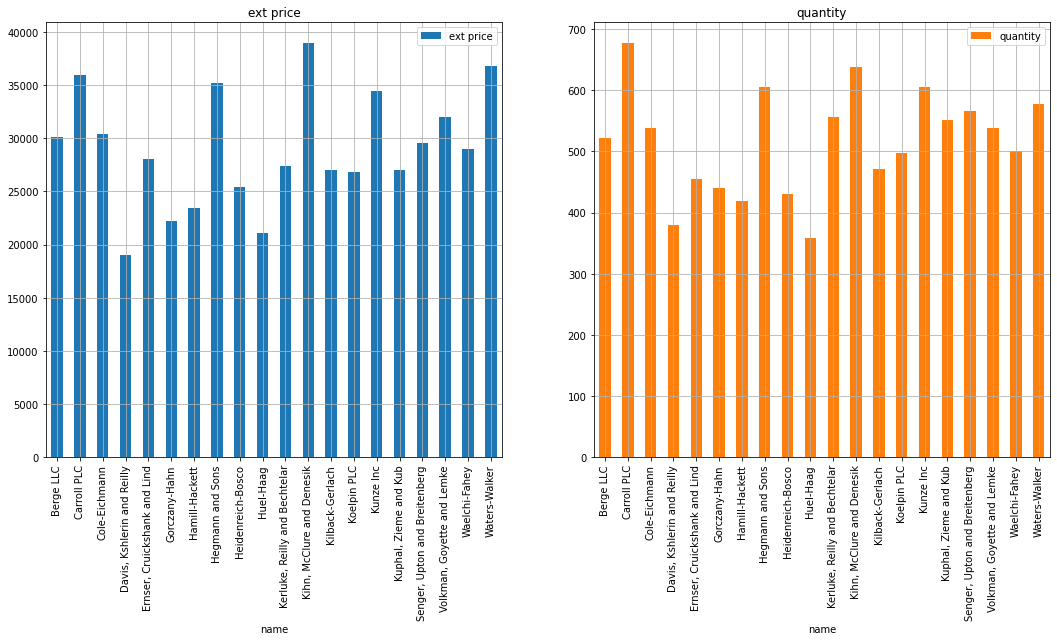

In [26]:
sales_totals.plot(kind='bar',grid=True,subplots=True,layout=(1,2),figsize=(18,8))

<AxesSubplot:xlabel='name'>

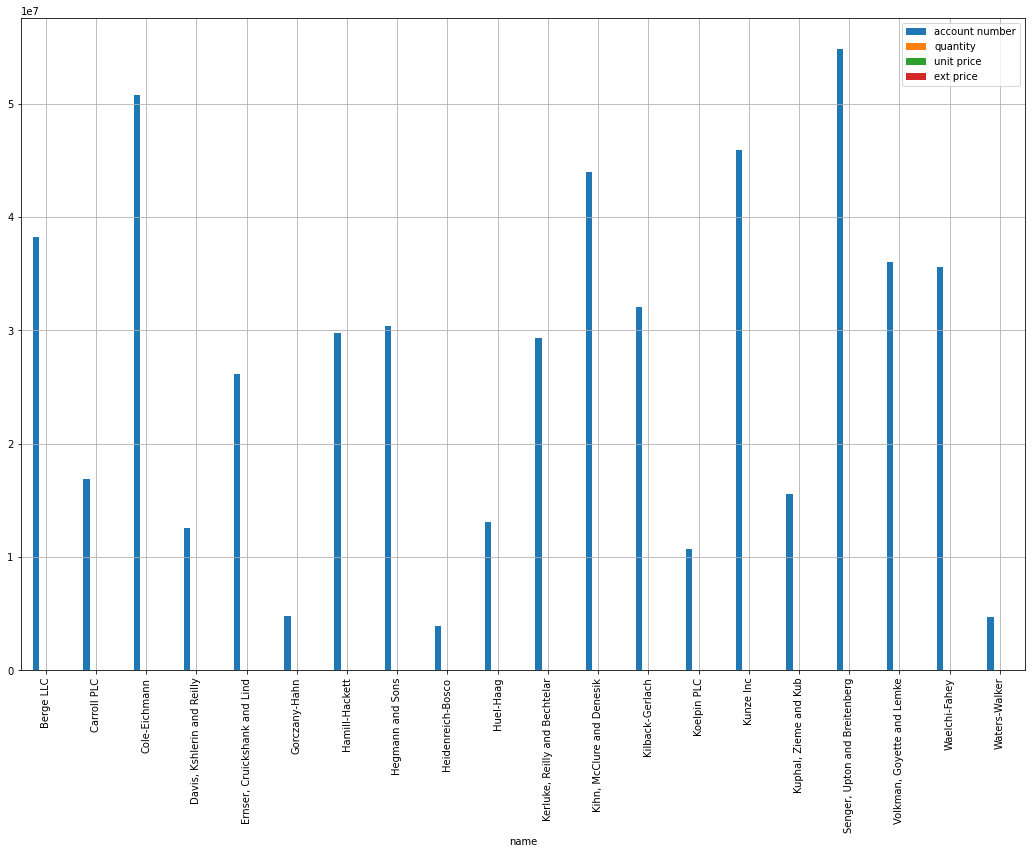

In [27]:
group_final.plot(kind='bar',grid=True,figsize=(18,12))

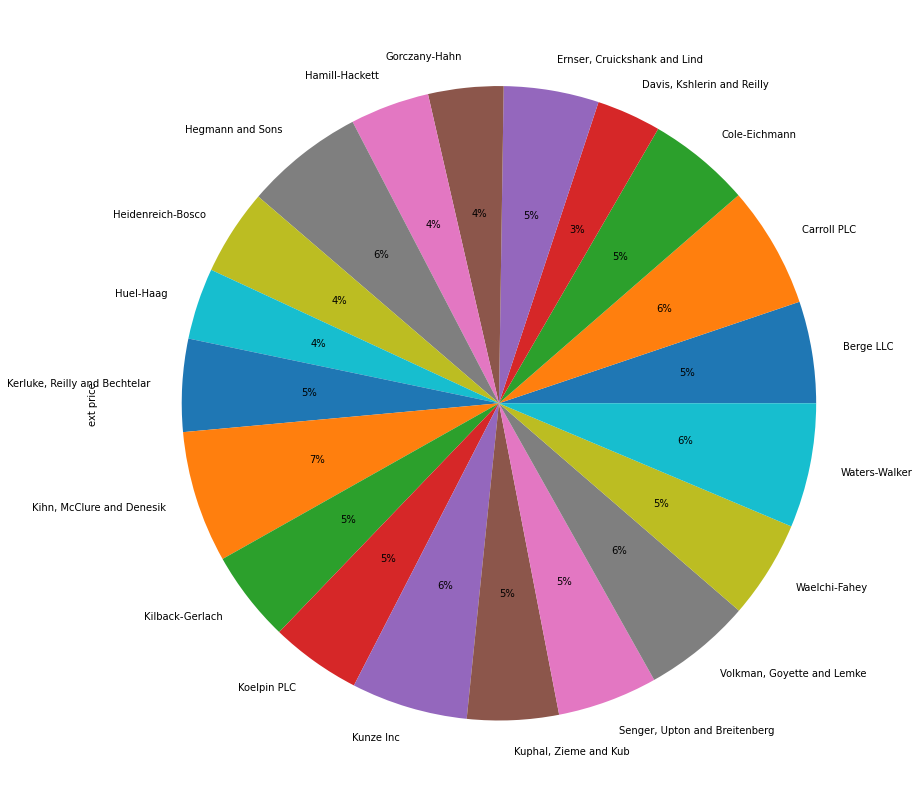

In [28]:
group_final['ext price'].plot(kind='pie',figsize=(13,14),autopct='%.0f%%')
plt.tight_layout()
plt.subplots=True
plt.show()

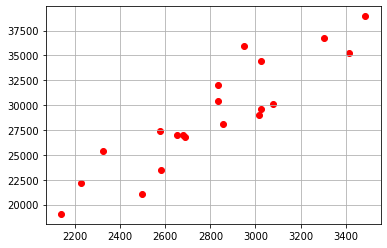

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

In [29]:
plt.grid(True)
plt.scatter(group_final['unit price'],group_final['ext price'],color='r',marker='o')
plt.show()
plt.figure(figsize=(16,10))

In [30]:
customers = sales[['name','category','ext price','date']]
customers.head(5)

,name,category,ext price,date
0,Carroll PLC,Belt,578.24,2014-09-27 07:13:00
1,Heidenreich-Bosco,Shoes,1018.78,2014-07-29 02:10:00
2,"Kerluke, Reilly and Bechtelar",Shirt,289.92,2014-03-01 10:51:00
3,Waters-Walker,Shirt,413.40,2013-11-17 20:41:00
4,Waelchi-Fahey,Shirt,1793.52,2014-01-03 08:14:00


In [31]:
category_group = customers.groupby(['name','category']).sum()  #'date'

In [32]:
unstack = category_group.unstack()
unstack

ext price                    
category                           Belt     Shirt     Shoes
name                                                       
Berge LLC                       6033.53   9670.24  14361.10
Carroll PLC                     9359.26  13717.61  12857.44
Cole-Eichmann                   8112.70  14528.01   7794.71
Davis, Kshlerin and Reilly      1604.13   7533.03   9917.60
Ernser, Cruickshank and Lind    5894.38  16944.19   5250.45
Gorczany-Hahn                   3642.48  12576.83   5988.59
Hamill-Hackett                  1609.74   8880.04  12944.00
Hegmann and Sons                4909.38  16774.47  13529.87
Heidenreich-Bosco               6262.94   5965.25  13200.10
Huel-Haag                       2219.51  11944.01   6924.36
Kerluke, Reilly and Bechtelar   4102.11  12958.23  10329.09
Kihn, McClure and Denesik      10116.90  18956.35   9862.04
Kilback-Gerlach                 2863.40   9904.85  14218.95
Koelpin PLC                     5327.96   7908.28  13575.42
Kunze Inc                       4264.59  15638.87  14503.08
Kuphal, Zieme and Kub           2009.69  12101.14  12921.03
Senger, Upton and Breitenberg   9509.88   7659.70  12407.88
Volkman, Goyette and Lemke      4429.01  12791.27  14786.59
Waelchi-Fahey                   8285.72  11689.05   8993.91
Waters-Walker                   5957.24  18633.71  12188.01

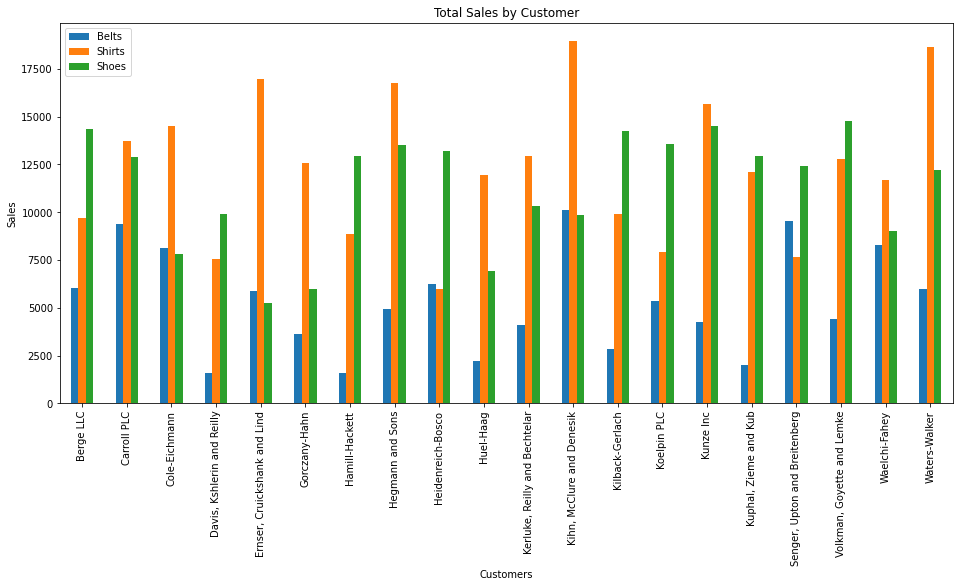

In [33]:
# Plot and show the stacked bar chart

#stack_bar_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer (categorical)",figsize=(15,7))
stack_bar_plot = unstack.plot(kind='bar',title="Total Sales by Customer",figsize=(16,7))
stack_bar_plot.set_xlabel("Customers")
stack_bar_plot.set_ylabel("Sales")
stack_bar_plot.legend(["Belts","Shirts","Shoes"])#, loc=1,ncol=3)
plt.show()

array([<AxesSubplot:title={'center':'(ext price, Belt)'}, xlabel='name'>,
       <AxesSubplot:title={'center':'(ext price, Shirt)'}, xlabel='name'>,
       <AxesSubplot:title={'center':'(ext price, Shoes)'}, xlabel='name'>],
      dtype=object)

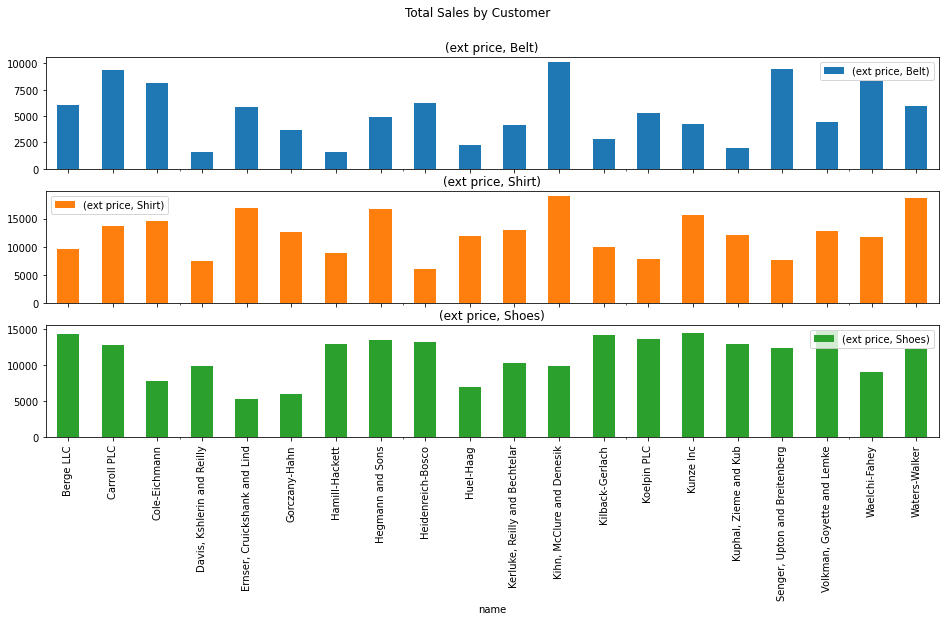

In [34]:
unstack.plot(kind='bar',title="Total Sales by Customer",figsize=(16,7), subplots=True)

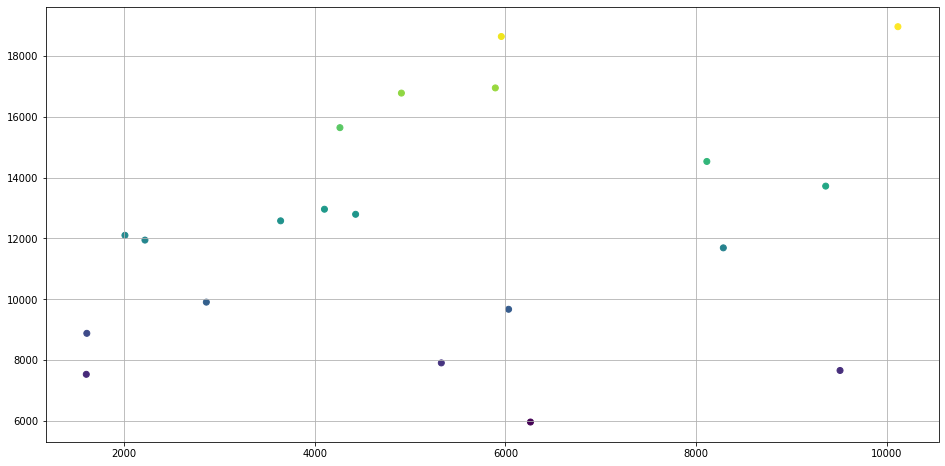

In [37]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.scatter(unstack[('ext price', 'Belt')],unstack[('ext price','Shirt')],marker='o',cmap='viridis',c=unstack[('ext price','Shirt')])
plt.show()

In [43]:
belt = unstack[('ext price','Belt')]
shirt = unstack[('ext price','Shirt')]
belt

name
Berge LLC                         6033.53
Carroll PLC                       9359.26
Cole-Eichmann                     8112.70
Davis, Kshlerin and Reilly        1604.13
Ernser, Cruickshank and Lind      5894.38
Gorczany-Hahn                     3642.48
Hamill-Hackett                    1609.74
Hegmann and Sons                  4909.38
Heidenreich-Bosco                 6262.94
Huel-Haag                         2219.51
Kerluke, Reilly and Bechtelar     4102.11
Kihn, McClure and Denesik        10116.90
Kilback-Gerlach                   2863.40
Koelpin PLC                       5327.96
Kunze Inc                         4264.59
Kuphal, Zieme and Kub             2009.69
Senger, Upton and Breitenberg     9509.88
Volkman, Goyette and Lemke        4429.01
Waelchi-Fahey                     8285.72
Waters-Walker                     5957.24
Name: (ext price, Belt), dtype: float64

In [42]:
# Create a simple histogram of purchase volumes

# Plot Overview ????  
#purchase_patterns = sales[sales['ext price']<=300][['category','ext price']]
#purchase_patterns = sales[sales['ext price']<=300]['category']
#purchase_patterns = sales[sales['ext price']<=300][ [columnName1,columnName2] ]
#len(purchase_patterns)
#purchase_patterns.count()

purchase_patterns = sales[['ext price','category','date']] #TEST: exp price <=300
purchase_patterns['ext price'][::8]

0       578.24
8       649.23
16      142.48
24      667.52
32       71.50
        ...   
960    1122.29
968     416.60
976     184.46
984      91.96
992     244.44
Name: ext price, Length: 125, dtype: float64

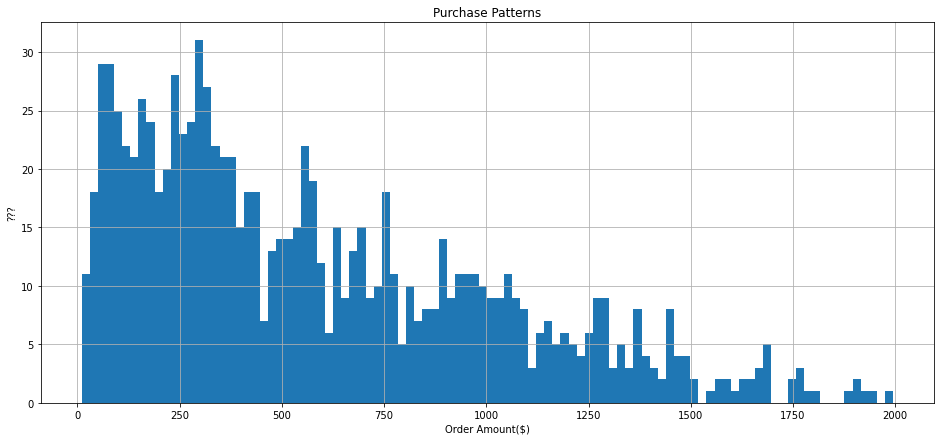

In [47]:
purchase_plot = purchase_patterns['ext price'].hist(bins=100,figsize=(16,7))  #Distribution: min-max > range (TASK: bin?)
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")
purchase_plot.set_ylabel("???")
plt.show()

<AxesSubplot:ylabel='Density'>

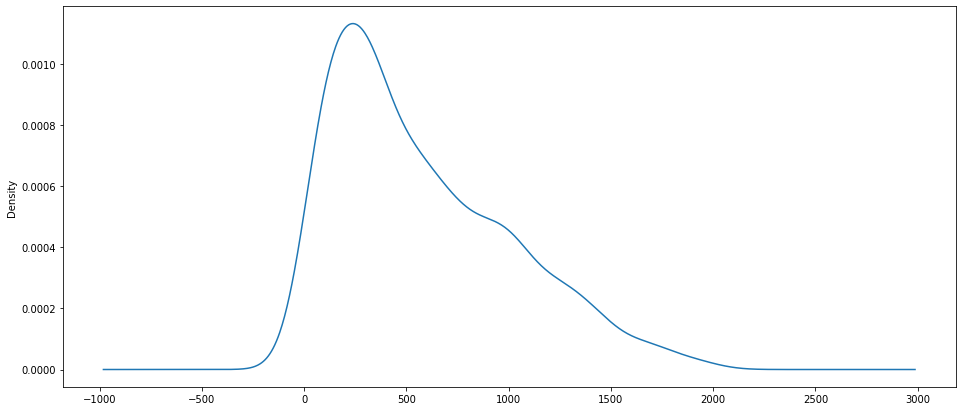

In [48]:
purchase_patterns['ext price'].plot.kde(figsize=(16,7))

<AxesSubplot:>

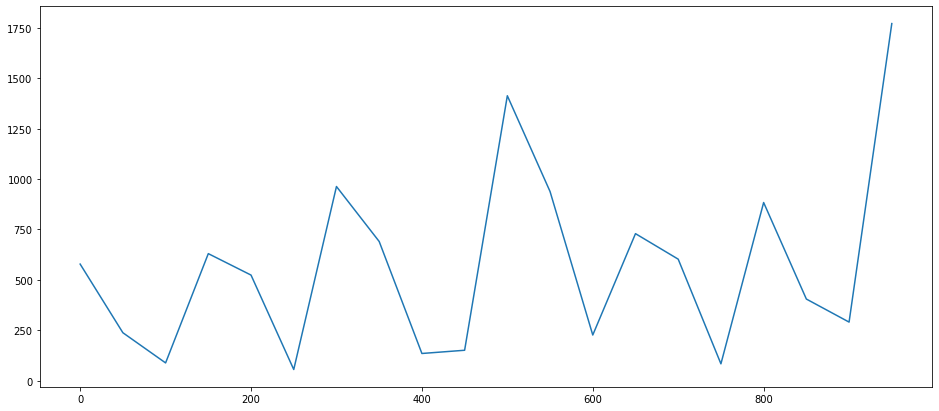

In [50]:
purchase_patterns['ext price'][::50].plot(figsize=(16,7))

In [51]:
purchase_pattern = purchase_patterns.set_index('date')
purchase_pattern.head(5)

,ext price,category
date,,
2014-09-27 07:13:00,578.24,Belt
2014-07-29 02:10:00,1018.78,Shoes
2014-03-01 10:51:00,289.92,Shirt
2013-11-17 20:41:00,413.40,Shirt
2014-01-03 08:14:00,1793.52,Shirt


<ipython-input-56-f32ea671d08b>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  purchase_pattern.loc['2013/10/01':'2013/11/30'].plot(figsize=(16,7))


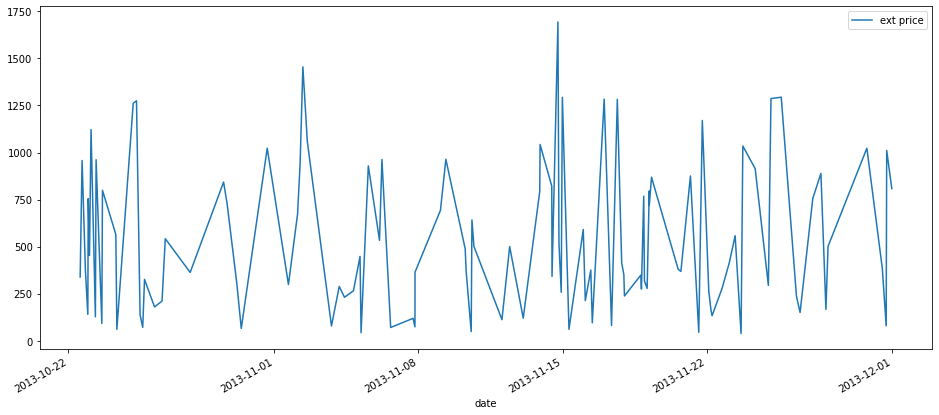

In [56]:
purchase_pattern.loc['2013/10/01':'2013/11/30'].plot(figsize=(16,7))
plt.savefig("filename.jpg")

In [57]:
purchase_patterns['date'].describe()

<ipython-input-57-4bce171c89d9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  purchase_patterns['date'].describe()


count                    1000
unique                    998
top       2014-02-15 06:51:00
freq                        2
first     2013-10-22 13:54:00
last      2014-10-22 11:43:00
Name: date, dtype: object

In [58]:
purchase_pattern

,ext price,category
date,,
2014-09-27 07:13:00,578.24,Belt
2014-07-29 02:10:00,1018.78,Shoes
2014-03-01 10:51:00,289.92,Shirt
2013-11-17 20:41:00,413.40,Shirt
2014-01-03 08:14:00,1793.52,Shirt
...,...,...
2014-08-03 10:39:00,665.50,Belt
2014-05-03 21:18:00,314.56,Shoes
2014-06-14 12:43:00,1182.35,Shoes


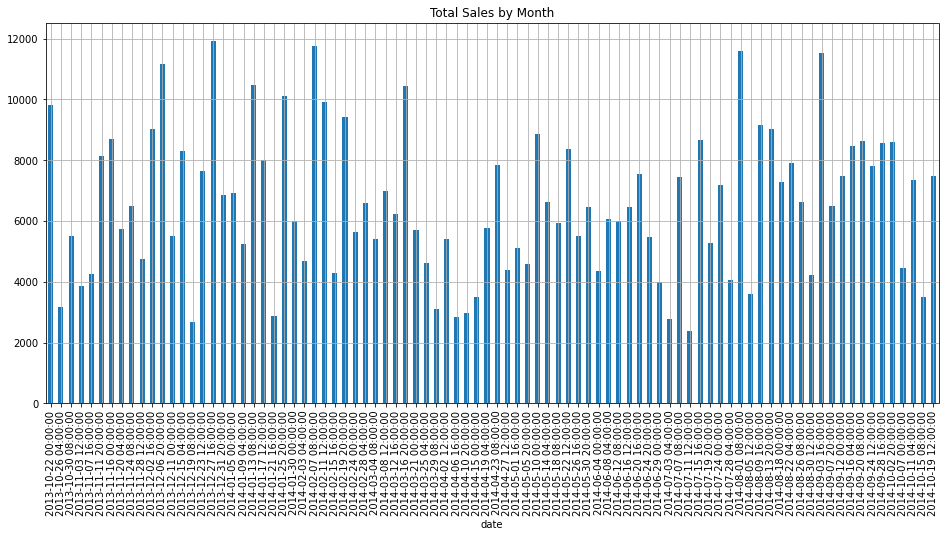

In [60]:
month_plot = purchase_pattern.resample('100H').sum().plot(title = "Total Sales by Month",legend=None,figsize=(16,7),kind='bar', grid=True)
fig = month_plot.get_figure()
plt.savefig("month_plot.jpg")

In [61]:
sales.head(10)

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:00
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:00
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:00
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:00
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:00
5,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,17,52.82,897.94,2013-12-04 02:07:00
6,995267,Cole-Eichmann,GS-86623,Shoes,18,15.28,275.04,2014-04-09 16:15:00
7,524021,Hegmann and Sons,LL-46261,Shoes,7,78.78,551.46,2014-06-18 19:25:00
8,929400,"Senger, Upton and Breitenberg",LW-86841,Shoes,17,38.19,649.23,2014-02-10 05:55:00
9,563905,"Kerluke, Reilly and Bechtelar",KV-99194,Shirt,12,26.98,323.76,2014-05-20 00:21:00


In [62]:
pivot1 = pd.pivot_table(sales,index=['name','category'])
pivot1.tail(9)

account number   ext price   quantity  \
name                       category                                          
Volkman, Goyette and Lemke Belt              750461  553.626250  12.000000   
                           Shirt             750461  639.563500  11.000000   
                           Shoes             750461  739.329500  11.100000   
Waelchi-Fahey              Belt              659366  487.395294   8.764706   
                           Shirt             659366  584.452500  10.050000   
                           Shoes             659366  529.053529   8.882353   
Waters-Walker              Belt               93356  992.873333  13.833333   
                           Shirt              93356  776.404583  12.000000   
                           Shoes              93356  609.400500  10.350000   

                                     unit price  
name                       category              
Volkman, Goyette and Lemke Belt       49.841250  
                           Shirt      56.812500  
                           Shoes      64.882000  
Waelchi-Fahey              Belt       56.806471  
                           Shirt      52.883500  
                           Shoes      58.472353  
Waters-Walker              Belt       68.678333  
                           Shirt      66.806667  
                           Shoes      64.426000

In [65]:
sales[sales['name'].str.contains('Walker') & (sales['category']=='Shirt')]['quantity'].mean() #check in output above for Walker

12.0

In [66]:
pivot1.loc['Waters-Walker','Belt']['quantity']

13.833333333333334

In [67]:
sales[sales.name.str.contains('Waters-Walker')]['category'].value_counts()

Shirt    24
Shoes    20
Belt      6
Name: category, dtype: int64

In [71]:
sales[sales.name.str.contains('Waters-Walker')].tail(3)

,account number,name,sku,category,quantity,unit price,ext price,date
986,93356,Waters-Walker,KV-99194,Shirt,20,99.74,1994.80,2014-04-18 15:39:00
990,93356,Waters-Walker,AS-93055,Shirt,9,68.62,617.58,2014-08-12 08:06:00
997,93356,Waters-Walker,GS-86623,Shoes,13,90.95,1182.35,2014-06-14 12:43:00


In [73]:
pd.pivot_table(sales[sales.name.str.contains('Waters-Walker')],index=['name','category','quantity'],aggfunc=[np.sum,np.mean,np.std])

sum                       \
                                account number ext price unit price   
name          category quantity                                       
Waters-Walker Belt     3                 93356    178.83      59.61   
                       11               186712   1348.49     122.59   
                       19               186712   3182.12     167.48   
                       20                93356   1247.80      62.39   
              Shirt    2                280068    439.40     219.70   
                       5                 93356    413.40      82.68   
                       6                 93356    290.04      48.34   
                       7                 93356    416.50      59.50   
                       9                280068   2111.31     234.59   
                       11                93356    915.42      83.22   
                       12               186712   1929.00     160.75   
                       13               186712   1188.07      91.39   
                       15                93356   1263.45      84.23   
                       16               186712   1550.56      96.91   
                       17               280068   3672.85     216.05   
                       19               186712   1449.51      76.29   
                       20               186712   2994.20     149.71   
              Shoes    1                 93356     76.61      76.61   
                       2                 93356    172.34      86.17   
                       3                 93356    298.26      99.42   
                       4                186712    492.84     123.21   
                       5                 93356    274.80      54.96   
                       6                 93356    307.08      51.18   
                       10                93356    757.20      75.72   
                       11               280068   2110.13     191.83   
                       12                93356   1151.52      95.96   
                       13               280068   2925.13     225.01   
                       15                93356    961.65      64.11   
                       16                93356    265.44      16.59   
                       18                93356    959.94      53.33   
                       19                93356   1013.27      53.33   
                       20                93356    421.80      21.09   

                                          mean                          \
                                account number    ext price unit price   
name          category quantity                                          
Waters-Walker Belt     3                 93356   178.830000  59.610000   
                       11                93356   674.245000  61.295000   
                       19                93356  1591.060000  83.740000   
                       20                93356  1247.800000  62.390000   
              Shirt    2                 93356   146.466667  73.233333   
                       5                 93356   413.400000  82.680000   
                       6                 93356   290.040000  48.340000   
                       7                 93356   416.500000  59.500000   
                       9                 93356   703.770000  78.196667   
                       11                93356   915.420000  83.220000   
                       12                93356   964.500000  80.375000   
                       13                93356   594.035000  45.695000   
                       15                93356  1263.450000  84.230000   
                       16                93356   775.280000  48.455000   
                       17                93356  1224.283333  72.016667   
                       19                93356   724.755000  38.145000   
                       20                93356  1497.100000  74.855000   
              Shoes    1                 93356    76.610000  76.610000   
   

In [75]:
pd.pivot_table(sales[sales.name.str.contains('Waters-Walker')],index=["name","category"],values=["ext price"],aggfunc=[sum,np.mean,min,max,np.std,len]).tail(6)  #mean()

sum        mean       min       max         std  \
                       ext price   ext price ext price ext price   ext price   
name          category                                                         
Waters-Walker Belt       5957.24  992.873333    178.83   1812.03  601.468709   
              Shirt     18633.71  776.404583     95.48   1994.80  460.790488   
              Shoes     12188.01  609.400500     76.61   1182.35  371.441578   

                             len  
                       ext price  
name          category            
Waters-Walker Belt           6.0  
              Shirt         24.0  
              Shoes         20.0

In [76]:
sales[sales['name'].str.contains('Walker') & (sales['category']=='Belt')]['ext price'].mean() #check in output aboev for Walker

992.8733333333333

In [77]:
len(sales[sales['name'].str.contains('Walker') & (sales['category']=='Belt')]['ext price'])

6

In [78]:
pd.pivot_table(sales,index=["name"],values=["ext price"],aggfunc=[np.sum,np.mean,len])#.max() #reduce (MapFilterReduce)

,sum,mean,len
,ext price,ext price,ext price
name,,,
Berge LLC,30064.87,578.170577,52.0
Carroll PLC,35934.31,630.426491,57.0
Cole-Eichmann,30435.42,596.772941,51.0
"Davis, Kshlerin and Reilly",19054.76,464.750244,41.0
"Ernser, Cruickshank and Lind",28089.02,597.638723,47.0
Gorczany-Hahn,22207.90,528.759524,42.0
Hamill-Hackett,23433.78,532.585909,44.0
Hegmann and Sons,35213.72,607.133103,58.0


In [79]:
pd.pivot_table(sales,index=["name"],values=["ext price"],aggfunc=[np.sum,np.mean,len]).min() #min()  max()

sum   ext price    19054.760000
mean  ext price      464.750244
len   ext price       40.000000
dtype: float64

In [80]:
pd.pivot_table(sales,index=["name"],values=["ext price"],columns=['category'],aggfunc=[np.sum,np.mean,len]).tail()

sum                            mean  \
                              ext price                       ext price   
category                           Belt     Shirt     Shoes        Belt   
name                                                                      
Kuphal, Zieme and Kub           2009.69  12101.14  12921.03  502.422500   
Senger, Upton and Breitenberg   9509.88   7659.70  12407.88  500.520000   
Volkman, Goyette and Lemke      4429.01  12791.27  14786.59  553.626250   
Waelchi-Fahey                   8285.72  11689.05   8993.91  487.395294   
Waters-Walker                   5957.24  18633.71  12188.01  992.873333   

                                                            len              
                                                      ext price              
category                            Shirt       Shoes      Belt Shirt Shoes  
name                                                                         
Kuphal, Zieme and Kub          550.051818  496.962692       4.0  22.0  26.0  
Senger, Upton and Breitenberg  450.570588  539.473043      19.0  17.0  23.0  
Volkman, Goyette and Lemke     639.563500  739.329500       8.0  20.0  20.0  
Waelchi-Fahey                  584.452500  529.053529      17.0  20.0  17.0  
Waters-Walker                  776.404583  609.400500       6.0  24.0  20.0

In [81]:
pd.pivot_table(sales,index=["name"],values=["ext price"],columns=['category'],aggfunc=[np.sum,np.mean],fill_value=0,margins=True,margins_name='TOTAL') 

sum                                   \
                               ext price                                    
category                            Belt      Shirt      Shoes      TOTAL   
name                                                                        
Berge LLC                        6033.53    9670.24   14361.10   30064.87   
Carroll PLC                      9359.26   13717.61   12857.44   35934.31   
Cole-Eichmann                    8112.70   14528.01    7794.71   30435.42   
Davis, Kshlerin and Reilly       1604.13    7533.03    9917.60   19054.76   
Ernser, Cruickshank and Lind     5894.38   16944.19    5250.45   28089.02   
Gorczany-Hahn                    3642.48   12576.83    5988.59   22207.90   
Hamill-Hackett                   1609.74    8880.04   12944.00   23433.78   
Hegmann and Sons                 4909.38   16774.47   13529.87   35213.72   
Heidenreich-Bosco                6262.94    5965.25   13200.10   25428.29   
Huel-Haag                        2219.51   11944.01    6924.36   21087.88   
Kerluke, Reilly and Bechtelar    4102.11   12958.23   10329.09   27389.43   
Kihn, McClure and Denesik       10116.90   18956.35    9862.04   38935.29   
Kilback-Gerlach                  2863.40    9904.85   14218.95   26987.20   
Koelpin PLC                      5327.96    7908.28   13575.42   26811.66   
Kunze Inc                        4264.59   15638.87   14503.08   34406.54   
Kuphal, Zieme and Kub            2009.69   12101.14   12921.03   27031.86   
Senger, Upton and Breitenberg    9509.88    7659.70   12407.88   29577.46   
Volkman, Goyette and Lemke       4429.01   12791.27   14786.59   32006.87   
Waelchi-Fahey                    8285.72   11689.05    8993.91   28968.68   
Waters-Walker                    5957.24   18633.71   12188.01   36778.96   
TOTAL                          106514.55  246775.13  226554.22  579843.90   

                                     mean                                      
                                ext price                                      
category                             Belt       Shirt       Shoes       TOTAL  
name                                                                           
Berge LLC                      670.392222  483.512000  624.395652  578.170577  
Carroll PLC                    668.518571  623.527727  612.259048  630.426491  
Cole-Eichmann                  624.053846  691.810000  458.512353  596.772941  
Davis, Kshlerin and Reilly     267.355000  470.814375  521.978947  464.750244  
Ernser, Cruickshank and Lind   654.931111  706.007917  375.032143  597.638723  
Gorczany-Hahn                  303.540000  598.896667  665.398889  528.759524  
Hamill-Hackett                 402.435000  522.355294  562.782609  532.585909  
Hegmann and Sons               490.938000  645.171923  614.994091  607.133103  
Heidenreich-Bosco              626.294000  596.525000  660.005000  635.707250  
Huel-Haag                      246.612222  628.632105  461.624000  490.415814  
Kerluke, Reilly and Bechtelar  512.763750  617.058571  449.090870  526.719808  
Kihn, McClure and Denesik      843.075000  702.087037  519.054737  671.298103  
Kilback-Gerlach                477.233333  582.638235  646.315909  599.715556  
Koelpin PLC                    380.568571  527.218667  565.642500  505.880377  
Kunze Inc                      710.765000  625.554800  630.568696  637.158148  
Kuphal, Zieme and Kub          502.422500  550.051818  496.962692  519.843462  
Senger, Upton and Breitenberg  500.520000  450.570588  539.473043  501.312881  
Volkman, Goyette and Lemke     553.626250  639.563500  739.329500  666.809792  
Waelchi-Fahey                  487.395294  584.452500  529.053529  536.457037  
Waters-Walker                  992.873333  776.404583  609.400500  735.579200  
TOTAL                          543.441582  610.829530  566.385550  579.843900

In [82]:
#apply distinct function to choosen values, (column as key and function as value inside dictionary)

pd.pivot_table(sales,
               index=["name"],values=["ext price","quantity"],columns=['category'],
               aggfunc={"quantity":len,"ext price":np.sum},margins=True)#//aggfunc={"Quantity":len,"Price":np.sum}

ext price                                   \
category                            Belt      Shirt      Shoes        All   
name                                                                        
Berge LLC                        6033.53    9670.24   14361.10   30064.87   
Carroll PLC                      9359.26   13717.61   12857.44   35934.31   
Cole-Eichmann                    8112.70   14528.01    7794.71   30435.42   
Davis, Kshlerin and Reilly       1604.13    7533.03    9917.60   19054.76   
Ernser, Cruickshank and Lind     5894.38   16944.19    5250.45   28089.02   
Gorczany-Hahn                    3642.48   12576.83    5988.59   22207.90   
Hamill-Hackett                   1609.74    8880.04   12944.00   23433.78   
Hegmann and Sons                 4909.38   16774.47   13529.87   35213.72   
Heidenreich-Bosco                6262.94    5965.25   13200.10   25428.29   
Huel-Haag                        2219.51   11944.01    6924.36   21087.88   
Kerluke, Reilly and Bechtelar    4102.11   12958.23   10329.09   27389.43   
Kihn, McClure and Denesik       10116.90   18956.35    9862.04   38935.29   
Kilback-Gerlach                  2863.40    9904.85   14218.95   26987.20   
Koelpin PLC                      5327.96    7908.28   13575.42   26811.66   
Kunze Inc                        4264.59   15638.87   14503.08   34406.54   
Kuphal, Zieme and Kub            2009.69   12101.14   12921.03   27031.86   
Senger, Upton and Breitenberg    9509.88    7659.70   12407.88   29577.46   
Volkman, Goyette and Lemke       4429.01   12791.27   14786.59   32006.87   
Waelchi-Fahey                    8285.72   11689.05    8993.91   28968.68   
Waters-Walker                    5957.24   18633.71   12188.01   36778.96   
All                            106514.55  246775.13  226554.22  579843.90   

                              quantity                    
category                          Belt Shirt Shoes   All  
name                                                      
Berge LLC                            9    20    23    52  
Carroll PLC                         14    22    21    57  
Cole-Eichmann                       13    21    17    51  
Davis, Kshlerin and Reilly           6    16    19    41  
Ernser, Cruickshank and Lind         9    24    14    47  
Gorczany-Hahn                       12    21     9    42  
Hamill-Hackett                       4    17    23    44  
Hegmann and Sons                    10    26    22    58  
Heidenreich-Bosco                   10    10    20    40  
Huel-Haag                            9    19    15    43  
Kerluke, Reilly and Bechtelar        8    21    23    52  
Kihn, McClure and Denesik           12    27    19    58  
Kilback-Gerlach                      6    17    22    45  
Koelpin PLC                         14    15    24    53  
Kunze Inc                            6    25    23    54  
Kuphal, Zieme and Kub                4    22    26    52  
Senger, Upton and Breitenberg       19    17    23    59  
Volkman, Goyette and Lemke           8    20    20    48  
Waelchi-Fahey                       17    20    17    54  
Waters-Walker                        6    24    20    50  
All                                196   404   400  1000

In [83]:
pivotFilter = pd.pivot_table(sales,index=["name","category"],
               values=["ext price","quantity"],aggfunc=[np.sum,np.mean,len],fill_value=0,margins=True)
#pivotFilter

In [84]:
pivotFilter.query("name==['Waters-Walker']")

sum                 mean                  len  \
                       ext price quantity   ext price   quantity ext price   
name          category                                                       
Waters-Walker Belt       5957.24       83  992.873333  13.833333         6   
              Shirt     18633.71      288  776.404583  12.000000        24   
              Shoes     12188.01      207  609.400500  10.350000        20   

                                 
                       quantity  
name          category           
Waters-Walker Belt            6  
              Shirt          24  
              Shoes          20

In [85]:
pivotFilter.query("category==['Shoes']")

sum                 mean  \
                                       ext price quantity   ext price   
name                          category                                  
Berge LLC                     Shoes     14361.10      236  624.395652   
Carroll PLC                   Shoes     12857.44      236  612.259048   
Cole-Eichmann                 Shoes      7794.71      155  458.512353   
Davis, Kshlerin and Reilly    Shoes      9917.60      185  521.978947   
Ernser, Cruickshank and Lind  Shoes      5250.45       96  375.032143   
Gorczany-Hahn                 Shoes      5988.59      100  665.398889   
Hamill-Hackett                Shoes     12944.00      239  562.782609   
Hegmann and Sons              Shoes     13529.87      240  614.994091   
Heidenreich-Bosco             Shoes     13200.10      233  660.005000   
Huel-Haag                     Shoes      6924.36      115  461.624000   
Kerluke, Reilly and Bechtelar Shoes     10329.09      211  449.090870   
Kihn, McClure and Denesik     Shoes      9862.04      186  519.054737   
Kilback-Gerlach               Shoes     14218.95      235  646.315909   
Koelpin PLC                   Shoes     13575.42      232  565.642500   
Kunze Inc                     Shoes     14503.08      271  630.568696   
Kuphal, Zieme and Kub         Shoes     12921.03      253  496.962692   
Senger, Upton and Breitenberg Shoes     12407.88      251  539.473043   
Volkman, Goyette and Lemke    Shoes     14786.59      222  739.329500   
Waelchi-Fahey                 Shoes      8993.91      151  529.053529   
Waters-Walker                 Shoes     12188.01      207  609.400500   

                                                        len           
                                         quantity ext price quantity  
name                          category                                
Berge LLC                     Shoes     10.260870        23       23  
Carroll PLC                   Shoes     11.238095        21       21  
Cole-Eichmann                 Shoes      9.117647        17       17  
Davis, Kshlerin and Reilly    Shoes      9.736842        19       19  
Ernser, Cruickshank and Lind  Shoes      6.857143        14       14  
Gorczany-Hahn                 Shoes     11.111111         9        9  
Hamill-Hackett                Shoes     10.391304        23       23  
Hegmann and Sons              Shoes     10.909091        22       22  
Heidenreich-Bosco             Shoes     11.650000        20       20  
Huel-Haag                     Shoes      7.666667        15       15  
Kerluke, Reilly and Bechtelar Shoes      9.173913        23       23  
Kihn, McClure and Denesik     Shoes      9.789474        19       19  
Kilback-Gerlach               Shoes     10.681818        22       22  
Koelpin PLC                   Shoes      9.666667        24       24  
Kunze Inc                     Shoes     11.782609        23       23  
Kuphal, Zieme and Kub         Shoes      9.730769        26       26  
Senger, Upton and Breitenberg Shoes     10.913043        23       23  
Volkman, Goyette and Lemke    Shoes     11.100000        20       20  
Waelchi-Fahey                 Shoes      8.882353        17       17  
Waters-Walker                 Shoes     10.350000        20       20

<AxesSubplot:xlabel='name,category'>

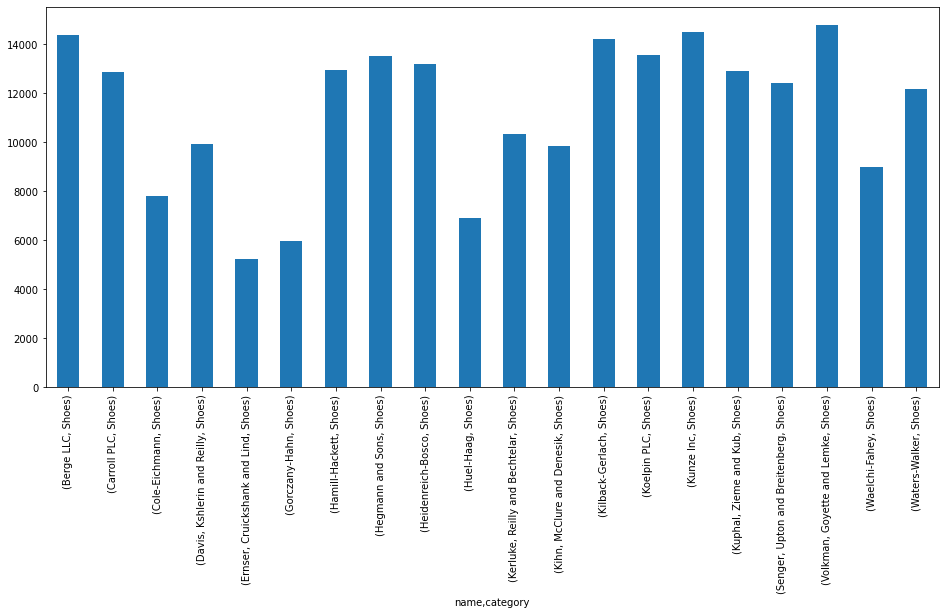

In [86]:
pivotFilter.query("category==['Shoes']")['sum','ext price'].plot(kind='bar',figsize=(16,7))

<AxesSubplot:xlabel='name,category'>

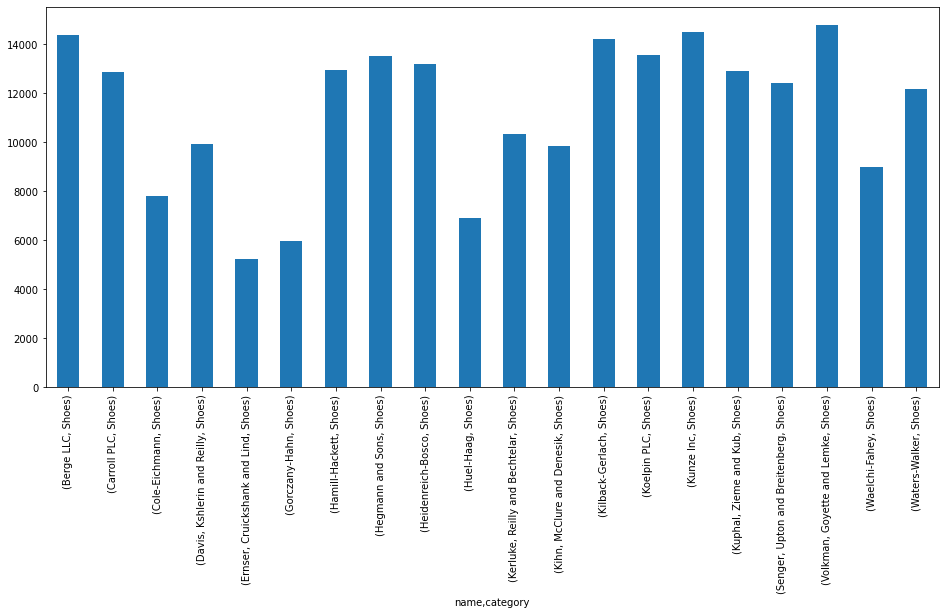

In [87]:
pivotFilter.query("category==['Shoes']")['sum','ext price'].plot(kind='bar',figsize=(16,7))

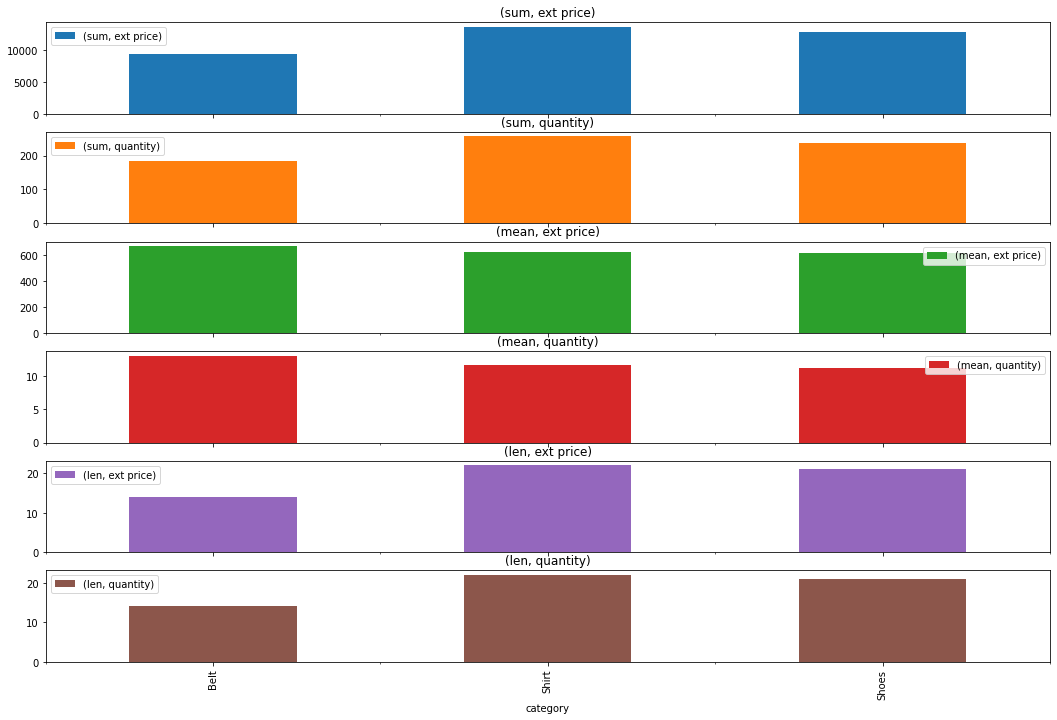

In [88]:
pivotFilter.loc["Carroll PLC"].plot(kind='bar',subplots=True, layout=(20,1), figsize=(18,40)
            )
plt.show()